In [ ]:
library("tidyverse")

In [2]:
# set urls

global_cases_url <- "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

global_deaths_url <- "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

US_cases_url <- "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"

US_death_url <- "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"

## Import

In [3]:
#import to dataframes

global_cases <- read.csv(global_cases_url)
global_deaths <- read.csv(global_deaths_url)
US_cases <- read.csv(US_cases_url)
US_deaths <- read.csv(US_death_url)

all_data <- list(global_cases, global_deaths, US_cases, US_deaths)


In [ ]:
lapply(all_data, head)

## Start cleaning and organizing

In [ ]:
geo_rename <- function(df) {
  df <- df %>%
    rename(Province.State = Province_State,
           Country.Region = Country_Region) %>%
    select(-Admin2, -UID, -FIPS, -code3, -Combined_Key, -starts_with("iso"))

  return(df)
}

US_cases_renamed <- geo_rename(US_cases)
US_deaths_renamed <- geo_rename(US_deaths)

lapply(list(US_cases_renamed, US_deaths_renamed), head)


In [21]:
pivot_organize <- function(df) {
  df <- df %>%
    select(-Lat, -contains("Long"), -contains("Population")) %>%
    pivot_longer(
        cols = -c(Province.State, Country.Region),
        names_to = "Date",
        values_to = "Cases"
    ) %>%
    select(Date, Country.Region, Province.State, Cases
    ) %>%
    mutate(Date = sub("^X", "", Date)
    ) %>%
     mutate(Date = as.Date(Date,format = "%m.%d.%y"))

  return(df)
}

global_cases_clean <- pivot_organize(global_cases)
global_deaths_clean <- pivot_organize(global_deaths)
us_cases_clean <- pivot_organize(US_cases_renamed)
us_deaths_clean <- pivot_organize(US_deaths_renamed)

global_deaths_clean <- global_deaths_clean %>%
  rename(Deaths = Cases)
us_deaths_clean <- us_deaths_clean %>%
  rename(Deaths = Cases)

all_data_clean <- list(global_cases_clean, global_deaths_clean, us_cases_clean, us_deaths_clean)

lapply(all_data_clean, head)

Date,Country.Region,Province.State,Cases
<date>,<chr>,<chr>,<int>
2020-01-22,Afghanistan,,0
2020-01-23,Afghanistan,,0
2020-01-24,Afghanistan,,0
2020-01-25,Afghanistan,,0
2020-01-26,Afghanistan,,0
2020-01-27,Afghanistan,,0
Date,Country.Region,Province.State,Deaths
<date>,<chr>,<chr>,<int>
2020-01-22,Afghanistan,,0


In [22]:
options(repr.plot.width = 10, repr.plot.height = 6)

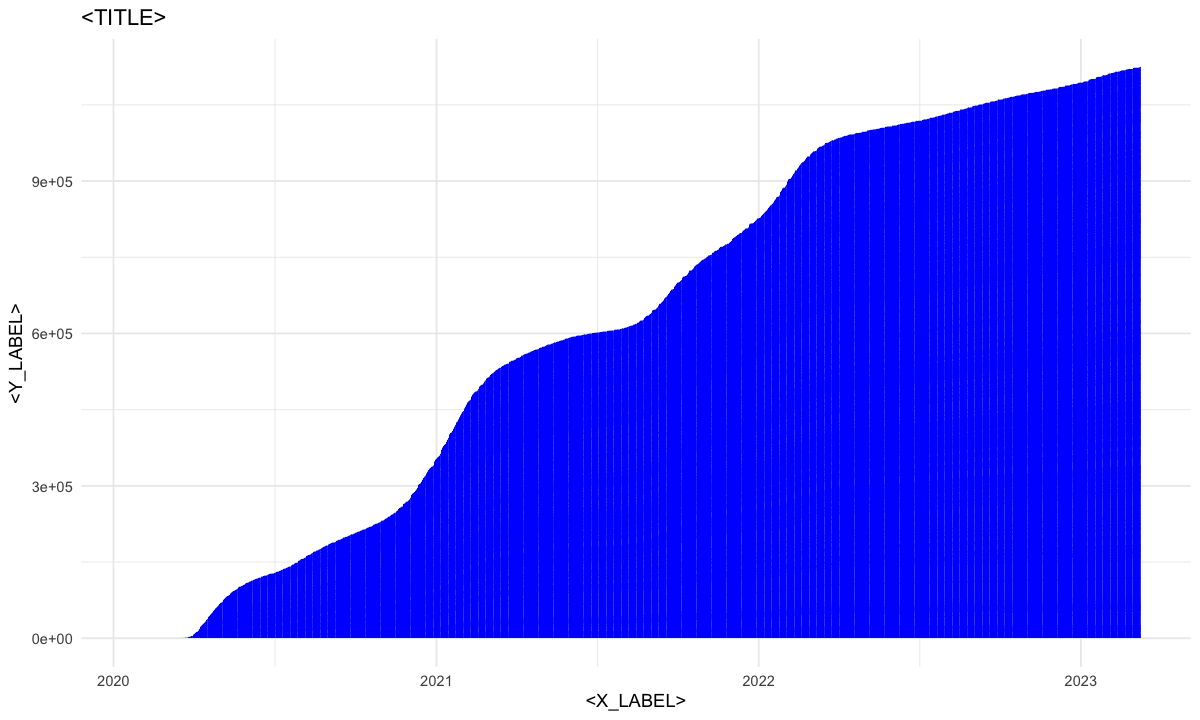

In [23]:
ggplot(data = us_deaths_clean, aes(x = Date, y = Deaths)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(
    title = "<TITLE>",
    x = "<X_LABEL>",
    y = "<Y_LABEL>"
  ) +
  theme_minimal()

In [24]:
# make a simple global daily cases df with a weekly column as well
global_daily_cases <- global_cases_clean %>%
    group_by(Date) %>%
    summarise(Total_cases = sum(Cases)) %>%
    mutate(New_daily_cases = Total_cases - lag(Total_cases, n = 1, default = NA)) %>%
    mutate(Week = floor_date(Date, unit = "week", week_start = 1))

global_daily_deaths <- global_deaths_clean %>%
    group_by(Date) %>%
    summarise(Total_deaths = sum(Deaths)) %>%
    mutate(New_daily_deaths = Total_deaths - lag(Total_deaths, n = 1, default = NA)) %>%
    mutate(Week = floor_date(Date, unit = "week", week_start = 1))

tail(global_daily_cases)
tail(global_daily_deaths)

Date,Total_cases,New_daily_cases,Week
<date>,<int>,<int>,<date>
2023-03-04,675968775,54195,2023-02-27
2023-03-05,676024901,56126,2023-02-27
2023-03-06,676082941,58040,2023-03-06
2023-03-07,676213378,130437,2023-03-06
2023-03-08,676392824,179446,2023-03-06
2023-03-09,676570149,177325,2023-03-06


Date,Total_deaths,New_daily_deaths,Week
<date>,<int>,<int>,<date>
2023-03-04,6877601,276,2023-02-27
2023-03-05,6877749,148,2023-02-27
2023-03-06,6878115,366,2023-03-06
2023-03-07,6879038,923,2023-03-06
2023-03-08,6880483,1445,2023-03-06
2023-03-09,6881802,1319,2023-03-06


In [25]:
# combine daily deaths and cases 
daily_global_combo <- left_join(global_daily_cases, global_daily_deaths, by = "Date")

daily_global_combo <- daily_global_combo %>%
    select(-Week.x) %>%
    rename(Week = Week.y)

# create a weekly global death/cases df
weekly_global_combo <- daily_global_combo %>%
    group_by(Week) %>%
    summarise(
        Weekly_total_cases = last(Total_cases),
        Weekly_total_deaths = last(Total_deaths),
        Weekly_new_cases = sum(New_daily_cases, na.rm = TRUE),
        Weekly_new_deaths = sum(New_daily_deaths, na.rm = TRUE)
)

tail(daily_global_combo)
tail(weekly_global_combo)

Date,Total_cases,New_daily_cases,Total_deaths,New_daily_deaths,Week
<date>,<int>,<int>,<int>,<int>,<date>
2023-03-04,675968775,54195,6877601,276,2023-02-27
2023-03-05,676024901,56126,6877749,148,2023-02-27
2023-03-06,676082941,58040,6878115,366,2023-03-06
2023-03-07,676213378,130437,6879038,923,2023-03-06
2023-03-08,676392824,179446,6880483,1445,2023-03-06
2023-03-09,676570149,177325,6881802,1319,2023-03-06


Week,Weekly_total_cases,Weekly_total_deaths,Weekly_new_cases,Weekly_new_deaths
<date>,<int>,<int>,<int>,<int>
2023-01-30,671721476,6847646,1377422,15390
2023-02-06,672906177,6856419,1184701,8773
2023-02-13,674056229,6864711,1150052,8292
2023-02-20,675044414,6871268,988185,6557
2023-02-27,676024901,6877749,980487,6481
2023-03-06,676570149,6881802,545248,4053


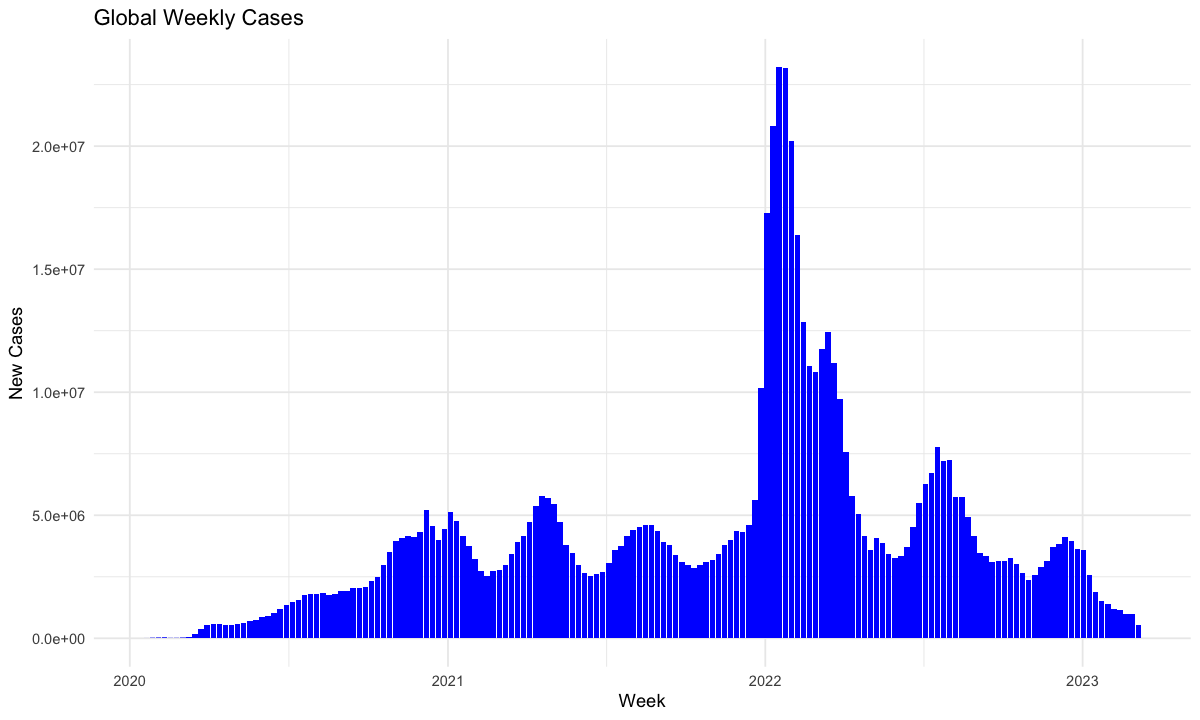

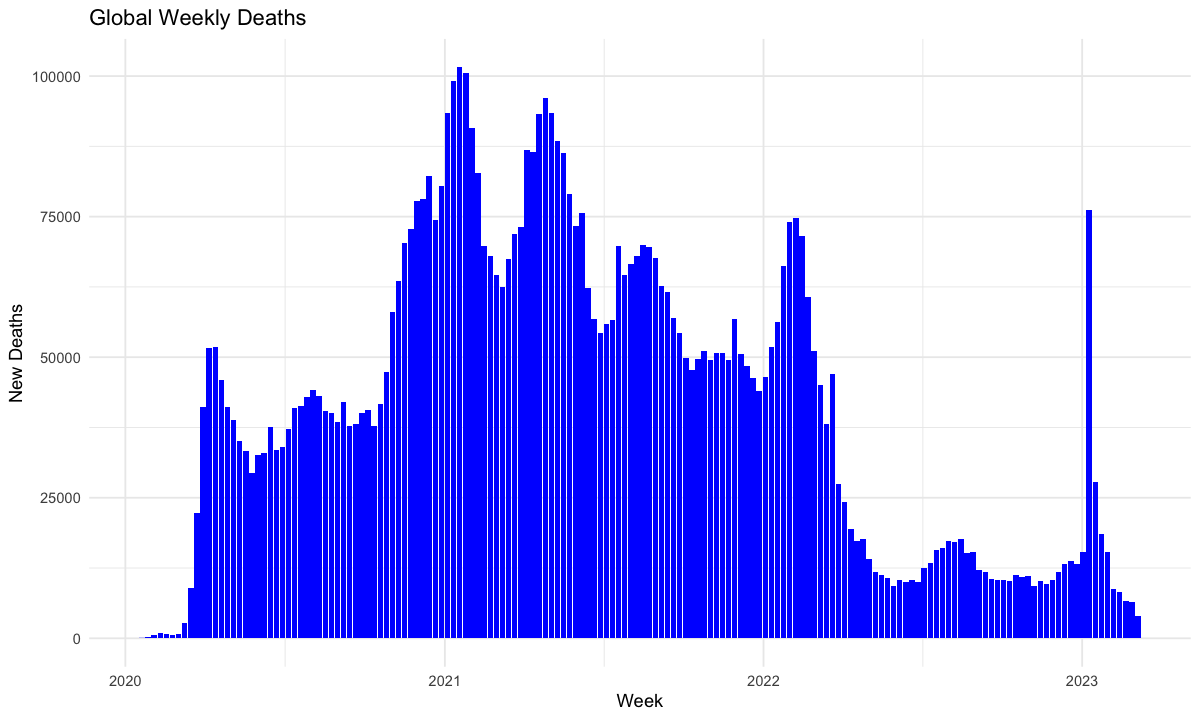

In [26]:
ggplot(data = weekly_global_combo, aes(x = Week, y = Weekly_new_cases)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(
    title = "Global Weekly Cases",
    x = "Week",
    y = "New Cases"
  ) +
  theme_minimal()

ggplot(data = weekly_global_combo, aes(x = Week, y = Weekly_new_deaths)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(
    title = "Global Weekly Deaths",
    x = "Week",
    y = "New Deaths"
  ) +
  theme_minimal()


In [28]:
weekly_global_combo <- weekly_global_combo %>%
    mutate(Weekly_death_to_case_ratio = (Weekly_new_deaths / Weekly_new_cases)* 100)

tail(weekly_global_combo)

Week,Weekly_total_cases,Weekly_total_deaths,Weekly_new_cases,Weekly_new_deaths,Weekly_death_to_case_ratio
<date>,<int>,<int>,<int>,<int>,<dbl>
2023-01-30,671721476,6847646,1377422,15390,1.1173046
2023-02-06,672906177,6856419,1184701,8773,0.7405244
2023-02-13,674056229,6864711,1150052,8292,0.7210109
2023-02-20,675044414,6871268,988185,6557,0.6635397
2023-02-27,676024901,6877749,980487,6481,0.6609981
2023-03-06,676570149,6881802,545248,4053,0.7433315


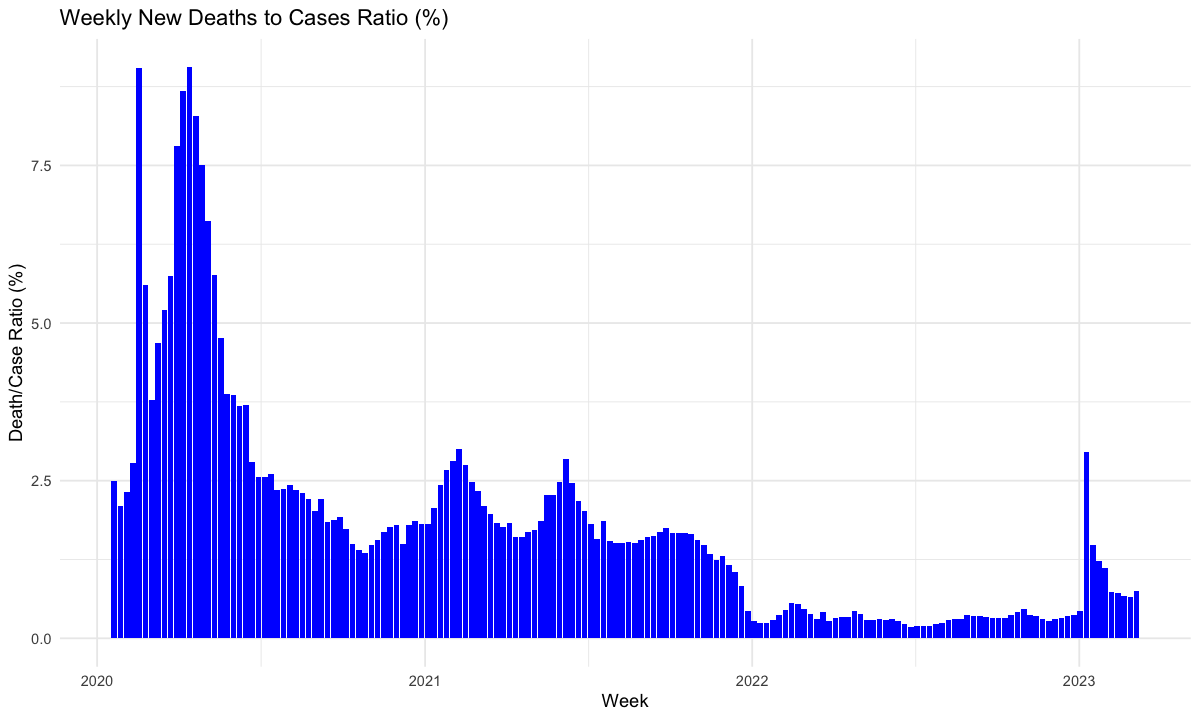

In [29]:
ggplot(data = weekly_global_combo, aes(x = Week, y = Weekly_death_to_case_ratio)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(
    title = "Weekly New Deaths to Cases Ratio (%)",
    x = "Week",
    y = "Death/Case Ratio (%)"
  ) +
  theme_minimal()

In [30]:
# add vaccine phase code

vac_rollout_start <- as.Date("2020-12-01")
vac_rollout_end <- as.Date("2021-12-01")

weekly_global_combo <- weekly_global_combo %>%
    mutate(Phase = case_when(
            Week < vac_rollout_start ~ "1. Pre",
            Week >= vac_rollout_start & Week < vac_rollout_end ~ "2. During",
            Week >= vac_rollout_end ~ "3. Post"
    ))

tail(weekly_global_combo)

Week,Weekly_total_cases,Weekly_total_deaths,Weekly_new_cases,Weekly_new_deaths,Weekly_death_to_case_ratio,Phase
<date>,<int>,<int>,<int>,<int>,<dbl>,<chr>
2023-01-30,671721476,6847646,1377422,15390,1.1173046,3. Post
2023-02-06,672906177,6856419,1184701,8773,0.7405244,3. Post
2023-02-13,674056229,6864711,1150052,8292,0.7210109,3. Post
2023-02-20,675044414,6871268,988185,6557,0.6635397,3. Post
2023-02-27,676024901,6877749,980487,6481,0.6609981,3. Post
2023-03-06,676570149,6881802,545248,4053,0.7433315,3. Post


In [31]:
# do a simple phased linear regression

global_phase_model <- lm(Weekly_death_to_case_ratio ~ Week * factor(Phase), data = weekly_global_combo)

summary(global_phase_model)


Call:
lm(formula = Weekly_death_to_case_ratio ~ Week * factor(Phase), 
    data = weekly_global_combo)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8365 -0.2591 -0.1333  0.1012  4.3100 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  2.888e+02  2.932e+01   9.850  < 2e-16 ***
Week                        -1.546e-02  1.590e-03  -9.727  < 2e-16 ***
factor(Phase)2. During      -2.447e+02  3.843e+01  -6.369 1.98e-09 ***
factor(Phase)3. Post        -3.026e+02  3.427e+01  -8.829 1.90e-15 ***
Week:factor(Phase)2. During  1.322e-02  2.068e-03   6.393 1.75e-09 ***
Week:factor(Phase)3. Post    1.621e-02  1.839e-03   8.813 2.09e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.002 on 158 degrees of freedom
Multiple R-squared:  0.6974,	Adjusted R-squared:  0.6878 
F-statistic: 72.81 on 5 and 158 DF,  p-value: < 2.2e-16


In [32]:
weekly_global_combo$Modeled <- predict(global_phase_model)

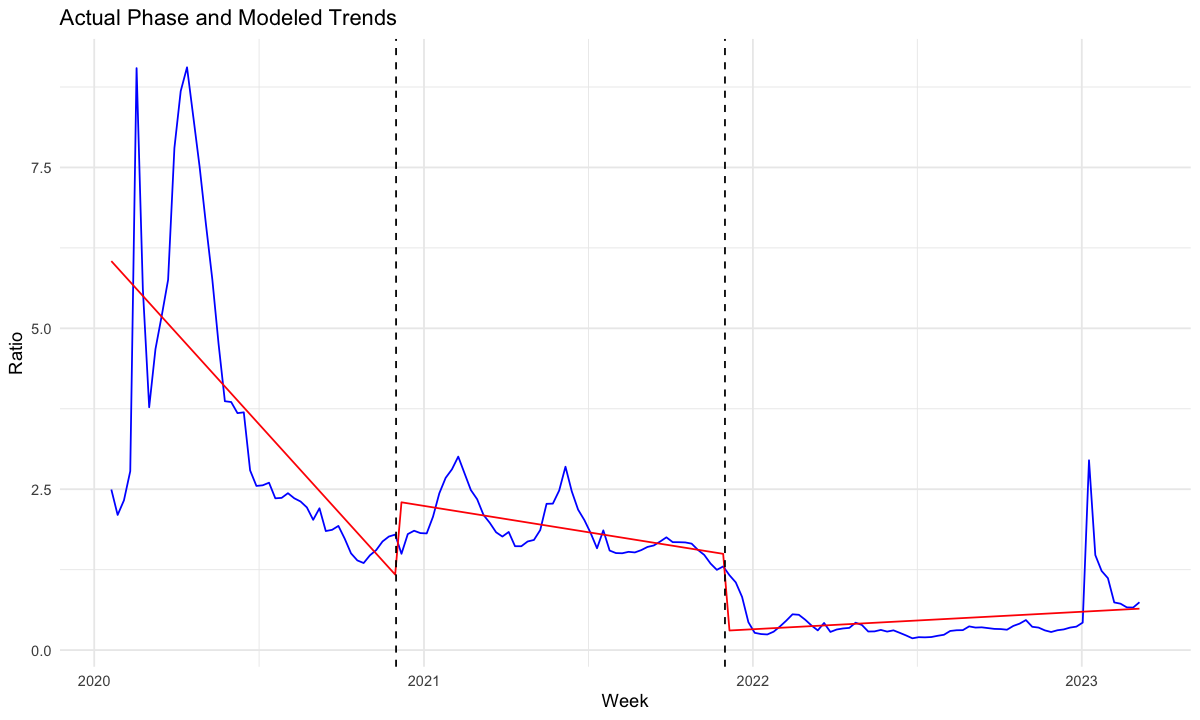

In [33]:
ggplot(weekly_global_combo, aes(x = Week)) +
  geom_line(aes(y = Weekly_death_to_case_ratio), color = "blue") +  
  geom_line(aes(y = Modeled), color = "red") +  
  labs(title = "Actual Phase and Modeled Trends",
       x = "Week", y = "Ratio") +
  geom_vline(xintercept = vac_rollout_start, linetype = "dashed", color = "black") +  
  geom_vline(xintercept = vac_rollout_end, linetype = "dashed", color = "black") +  
  theme_minimal()

In [34]:
global_phase_means <- weekly_global_combo %>%
    group_by(Phase) %>% 
    summarise(Phase_avg = mean(Modeled, na.rm = TRUE))

global_phase_means

Phase,Phase_avg
<chr>,<dbl>
1. Pre,3.608955
2. During,1.896143
3. Post,0.474002


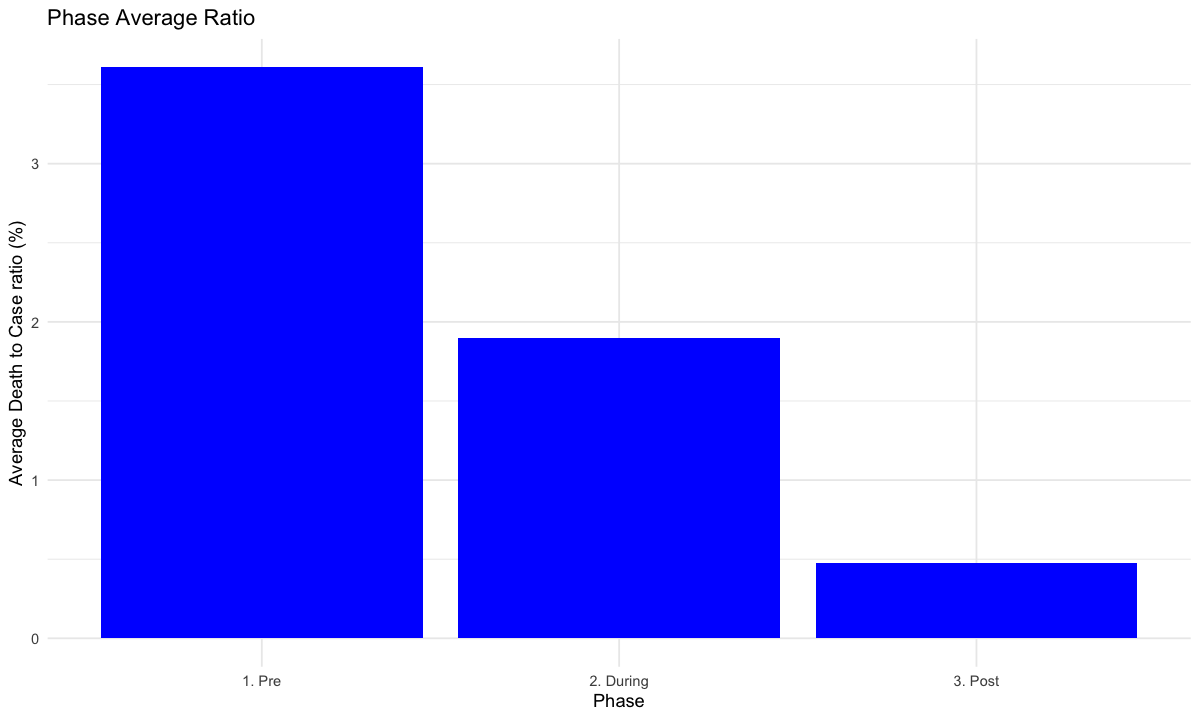

In [35]:
ggplot(data = global_phase_means, aes(x = Phase, y = Phase_avg)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(
    title = "Phase Average Ratio",
    x = "Phase",
    y = "Average Death to Case ratio (%)"
  ) +
  theme_minimal()

Start US

Date,Total_cases,New_daily_cases,Week
<date>,<int>,<int>,<date>
2023-03-04,103650837,2147,2023-02-27
2023-03-05,103646975,-3862,2023-02-27
2023-03-06,103655539,8564,2023-03-06
2023-03-07,103690910,35371,2023-03-06
2023-03-08,103755771,64861,2023-03-06
2023-03-09,103802702,46931,2023-03-06


Date,Total_deaths,New_daily_deaths,Week
<date>,<int>,<int>,<date>
2023-03-04,1122172,7,2023-02-27
2023-03-05,1122134,-38,2023-02-27
2023-03-06,1122181,47,2023-03-06
2023-03-07,1122516,335,2023-03-06
2023-03-08,1123246,730,2023-03-06
2023-03-09,1123836,590,2023-03-06


Date,Total_cases,New_daily_cases,Total_deaths,New_daily_deaths,Week
<date>,<int>,<int>,<int>,<int>,<date>
2023-03-04,103650837,2147,1122172,7,2023-02-27
2023-03-05,103646975,-3862,1122134,-38,2023-02-27
2023-03-06,103655539,8564,1122181,47,2023-03-06
2023-03-07,103690910,35371,1122516,335,2023-03-06
2023-03-08,103755771,64861,1123246,730,2023-03-06
2023-03-09,103802702,46931,1123836,590,2023-03-06


Week,Weekly_total_cases,Weekly_total_deaths,Weekly_new_cases,Weekly_new_deaths
<date>,<int>,<int>,<int>,<int>
2023-01-30,102607114,1111698,328687,4008
2023-02-06,102862879,1114537,255765,2839
2023-02-13,103136077,1117590,273198,3053
2023-02-20,103382763,1119588,246686,1998
2023-02-27,103646975,1122134,264212,2546
2023-03-06,103802702,1123836,155727,1702


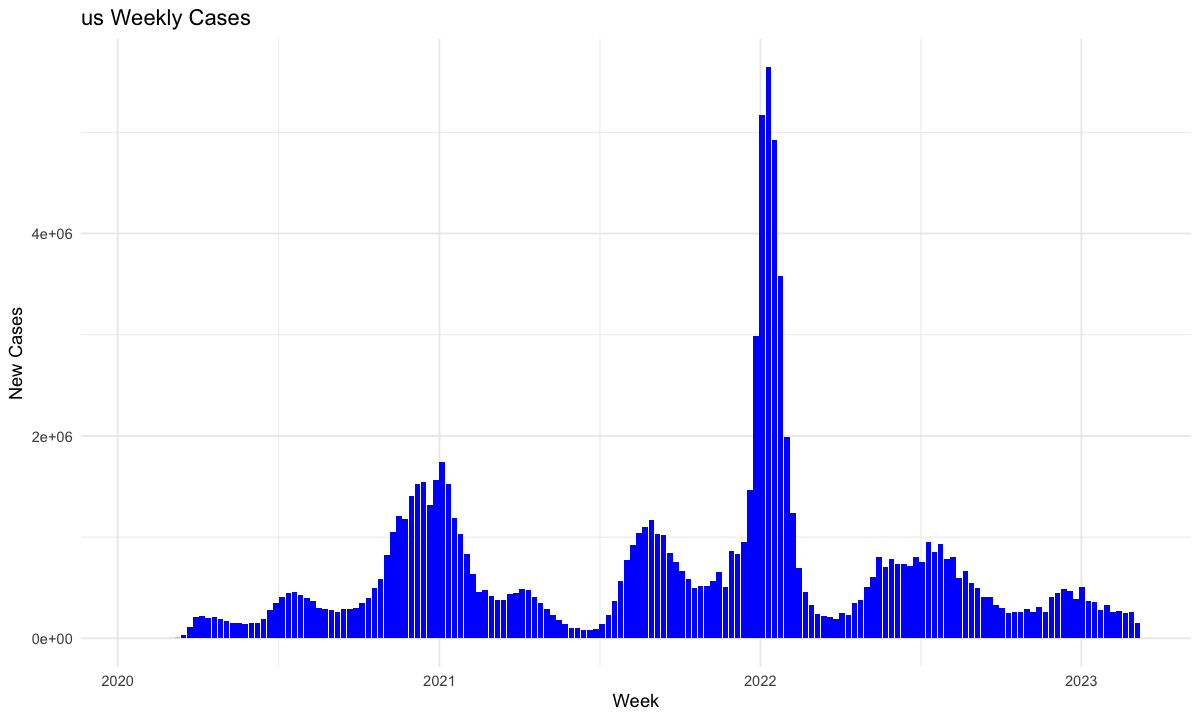

Week,Weekly_total_cases,Weekly_total_deaths,Weekly_new_cases,Weekly_new_deaths,Weekly_death_to_case_ratio
<date>,<int>,<int>,<int>,<int>,<dbl>
2023-01-30,102607114,1111698,328687,4008,1.2193972
2023-02-06,102862879,1114537,255765,2839,1.1100033
2023-02-13,103136077,1117590,273198,3053,1.1175045
2023-02-20,103382763,1119588,246686,1998,0.8099365
2023-02-27,103646975,1122134,264212,2546,0.9636201
2023-03-06,103802702,1123836,155727,1702,1.0929383


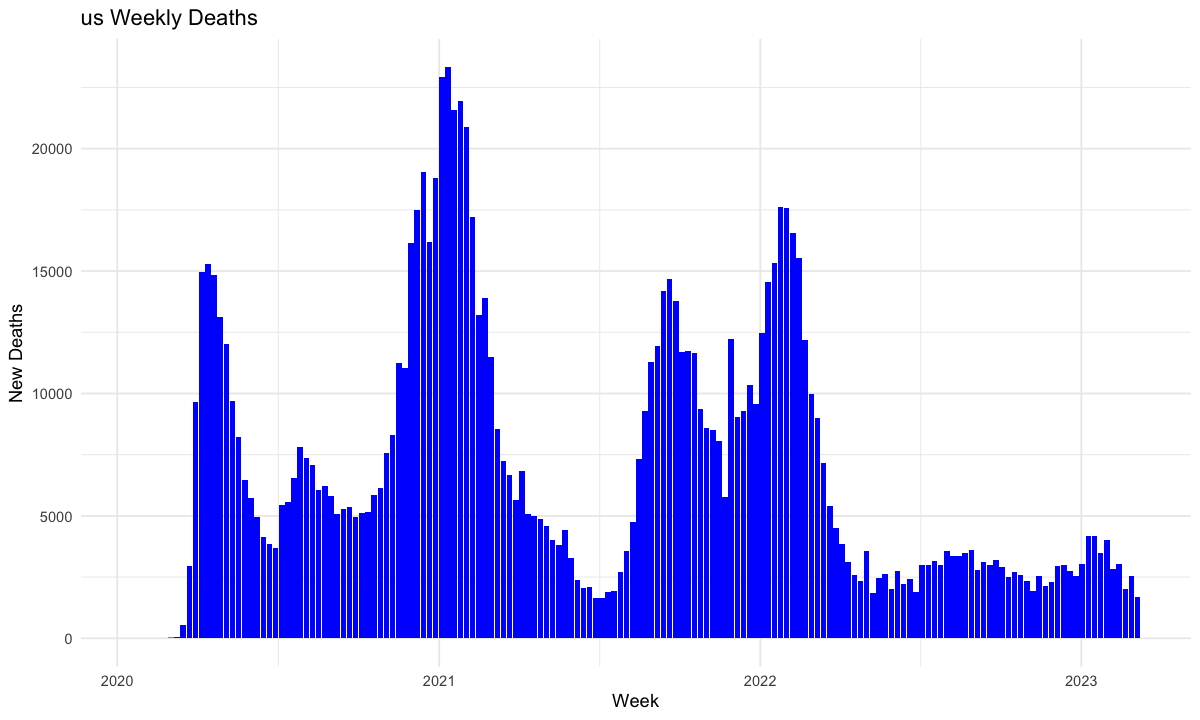

Week,Weekly_total_cases,Weekly_total_deaths,Weekly_new_cases,Weekly_new_deaths,Weekly_death_to_case_ratio,Phase
<date>,<int>,<int>,<int>,<int>,<dbl>,<chr>
2023-01-30,102607114,1111698,328687,4008,1.2193972,3. Post
2023-02-06,102862879,1114537,255765,2839,1.1100033,3. Post
2023-02-13,103136077,1117590,273198,3053,1.1175045,3. Post
2023-02-20,103382763,1119588,246686,1998,0.8099365,3. Post
2023-02-27,103646975,1122134,264212,2546,0.9636201,3. Post
2023-03-06,103802702,1123836,155727,1702,1.0929383,3. Post



Call:
lm(formula = Weekly_death_to_case_ratio ~ Week * factor(Phase), 
    data = weekly_us_combo)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5852 -0.6086 -0.1722  0.3683  4.7438 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  1.281e+02  3.684e+01   3.478 0.000653 ***
Week                        -6.812e-03  1.998e-03  -3.410 0.000825 ***
factor(Phase)2. During      -9.838e+01  4.829e+01  -2.037 0.043281 *  
factor(Phase)3. Post        -1.076e+02  4.307e+01  -2.498 0.013528 *  
Week:factor(Phase)2. During  5.317e-03  2.599e-03   2.046 0.042435 *  
Week:factor(Phase)3. Post    5.790e-03  2.311e-03   2.505 0.013256 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.259 on 158 degrees of freedom
Multiple R-squared:  0.2608,	Adjusted R-squared:  0.2374 
F-statistic: 11.15 on 5 and 158 DF,  p-value: 3.255e-09


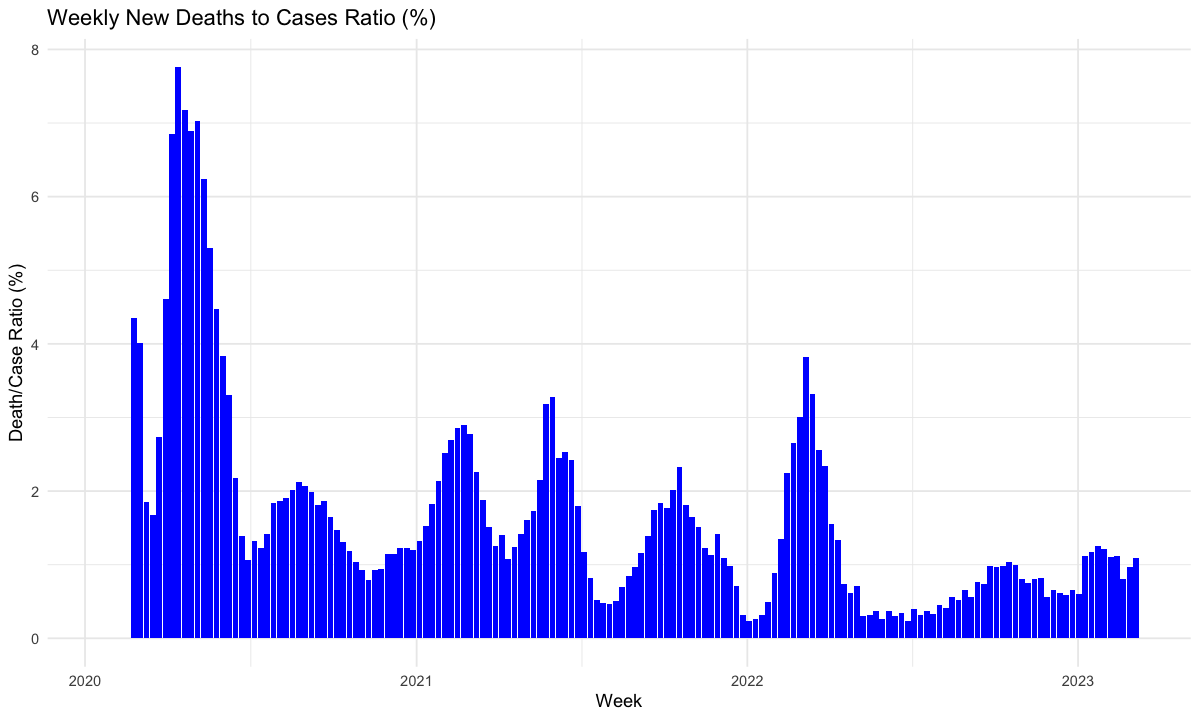

Phase,Phase_avg
<chr>,<dbl>
1. Pre,2.5122752
2. During,1.6540617
3. Post,0.9369398


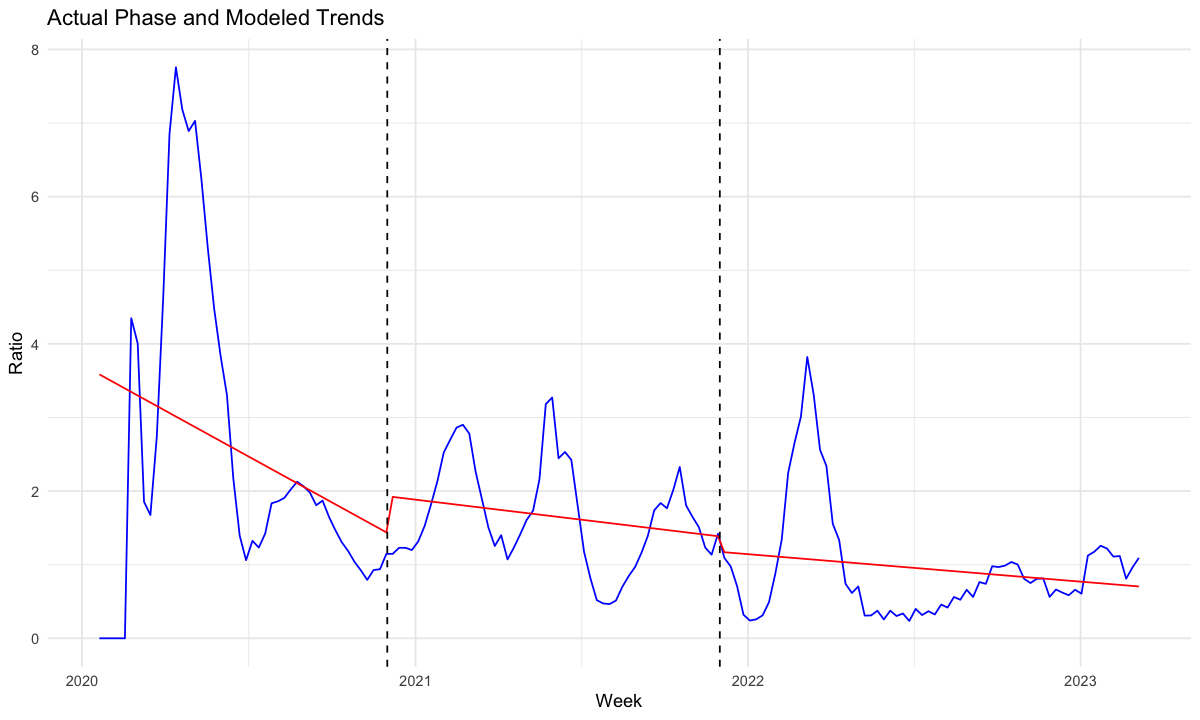

In [36]:
# make a simple us daily cases df with a weekly column as well
us_daily_cases <- us_cases_clean %>%
    group_by(Date) %>%
    summarise(Total_cases = sum(Cases)) %>%
    mutate(New_daily_cases = Total_cases - lag(Total_cases, n = 1, default = NA)) %>%
    mutate(Week = floor_date(Date, unit = "week", week_start = 1))

us_daily_deaths <- us_deaths_clean %>%
    group_by(Date) %>%
    summarise(Total_deaths = sum(Deaths)) %>%
    mutate(New_daily_deaths = Total_deaths - lag(Total_deaths, n = 1, default = NA)) %>%
    mutate(Week = floor_date(Date, unit = "week", week_start = 1))

tail(us_daily_cases)
tail(us_daily_deaths)
# combine daily deaths and cases 
daily_us_combo <- left_join(us_daily_cases, us_daily_deaths, by = "Date")

daily_us_combo <- daily_us_combo %>%
    select(-Week.x) %>%
    rename(Week = Week.y)

# create a weekly US death/cases df
weekly_us_combo <- daily_us_combo %>%
    group_by(Week) %>%
    summarise(
        Weekly_total_cases = last(Total_cases),
        Weekly_total_deaths = last(Total_deaths),
        Weekly_new_cases = sum(New_daily_cases, na.rm = TRUE),
        Weekly_new_deaths = sum(New_daily_deaths, na.rm = TRUE)
)

tail(daily_us_combo)
tail(weekly_us_combo)
ggplot(data = weekly_us_combo, aes(x = Week, y = Weekly_new_cases)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(
    title = "us Weekly Cases",
    x = "Week",
    y = "New Cases"
  ) +
  theme_minimal()

ggplot(data = weekly_us_combo, aes(x = Week, y = Weekly_new_deaths)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(
    title = "us Weekly Deaths",
    x = "Week",
    y = "New Deaths"
  ) +
  theme_minimal()

weekly_us_combo <- weekly_us_combo %>%
    mutate(Weekly_death_to_case_ratio = (Weekly_new_deaths / Weekly_new_cases)* 100)

tail(weekly_us_combo)
ggplot(data = weekly_us_combo, aes(x = Week, y = Weekly_death_to_case_ratio)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(
    title = "Weekly New Deaths to Cases Ratio (%)",
    x = "Week",
    y = "Death/Case Ratio (%)"
  ) +
  theme_minimal()
# add vaccine phase code

vac_rollout_start <- as.Date("2020-12-01")
vac_rollout_end <- as.Date("2021-12-01")

weekly_us_combo <- weekly_us_combo %>%
    mutate(Phase = case_when(
            Week < vac_rollout_start ~ "1. Pre",
            Week >= vac_rollout_start & Week < vac_rollout_end ~ "2. During",
            Week >= vac_rollout_end ~ "3. Post"
    ))

tail(weekly_us_combo)
# do a simple phased linear regression

us_phase_model <- lm(Weekly_death_to_case_ratio ~ Week * factor(Phase), data = weekly_us_combo)

summary(us_phase_model)
weekly_us_combo$Modeled <- predict(us_phase_model)
ggplot(weekly_us_combo, aes(x = Week)) +
  geom_line(aes(y = Weekly_death_to_case_ratio), color = "blue") +  
  geom_line(aes(y = Modeled), color = "red") +  
  labs(title = "Actual Phase and Modeled Trends",
       x = "Week", y = "Ratio") +
  geom_vline(xintercept = vac_rollout_start, linetype = "dashed", color = "black") +  
  geom_vline(xintercept = vac_rollout_end, linetype = "dashed", color = "black") +  
  theme_minimal()
us_phase_means <- weekly_us_combo %>%
    group_by(Phase) %>% 
    summarise(Phase_avg = mean(Modeled, na.rm = TRUE))

us_phase_means

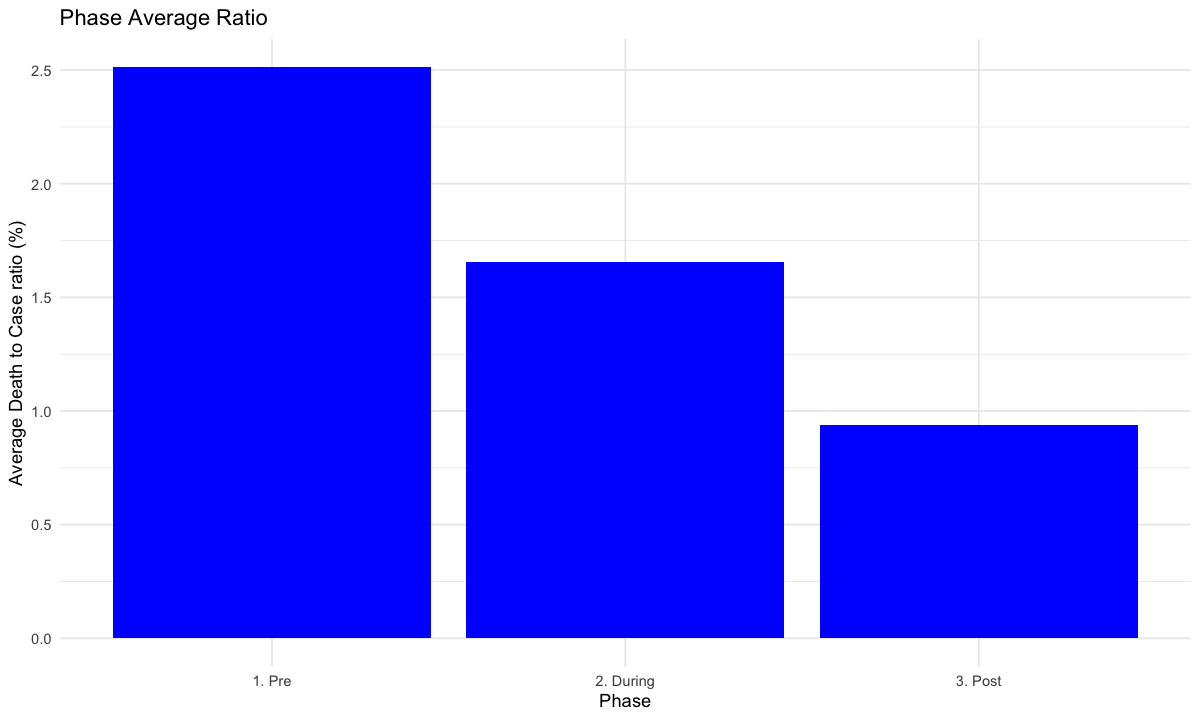

In [37]:
ggplot(data = us_phase_means, aes(x = Phase, y = Phase_avg)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(
    title = "Phase Average Ratio",
    x = "Phase",
    y = "Average Death to Case ratio (%)"
  ) +
  theme_minimal()